In [2]:
#Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data=pd.read_excel('HospitalDB-PythonHack.xlsx')

# Read excel file with sheet name

dict_df = pd.read_excel('HospitalDB-PythonHack.xlsx', 
                   sheet_name=['Patients','EDVisits','AmbulatoryVisits','ReAdmissionRegistry',
                              'Discharges','Providers','EDUnique'])


### 11. Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T

In [7]:
#Que:11: Connect to sql and Write a query to get list of Provider names whose Providername is starting with letter T

Providers_df = dict_df.get('Providers')
Names=Providers_df['ProviderName']
check='T'
nameswithT=[idx for idx in Names if idx.lower().startswith(check.lower())]
print ("Provider Names with T:" +str(nameswithT) )


Provider Names with T:['Ted Texas', 'Ted Green', 'Ted Black', 'Tyler Conner', 'Tony Creed', 'Trent Tye']


In [18]:
data.columns

Index(['ProviderID', 'ProviderName', 'ProviderSpecialty',
       'ProviderDateOnStaff'],
      dtype='object')

### 13.Find the number of null values in BloodPressureSystolic column

In [33]:
#13: Find the number of null values in BloodPressureSystolic column

AmbulatoryVisits_df = dict_df.get('AmbulatoryVisits')

AmbulatoryVisits_df

count= AmbulatoryVisits_df['BloodPressureSystolic'].isna().sum()
print(count)

124


### 14.Replace all the null values in ReadmissionFlag with 0

In [38]:
#14: Replace all the null values in ReadmissionFlag with 0

ReAdmissionRegistry_df= dict_df.get('ReAdmissionRegistry')
ReAdmissionRegistry_df

ReAdmissionRegistry_df = ReAdmissionRegistry_df.fillna({'ReadmissionFlag': 0})
ReAdmissionRegistry_df

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


### 17: Add column 'Age' in Patient table

In [104]:
# 17: Add column 'Age' in Patient table

Patients_df= dict_df.get('Patients')
Patients_df

Patients_df ["Age"] = pd.NaT

Patients_df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,NaT
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,NaT
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,NaT
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,NaT
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,NaT
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,NaT
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,NaT
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,NaT
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,NaT


### 18.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

In [73]:
#18: Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

Discharges_df= dict_df.get('Discharges')
#dischargetime_df = Discharges_df[['DischargeDate']].copy()
#dischargetime_df

datetime_df=pd.DataFrame(Discharges_df,columns=['Date','Time'])

datetime_df['Date'] = pd.to_datetime(Discharges_df['DischargeDate']).dt.date
datetime_df['Time'] = pd.to_datetime(Discharges_df['DischargeDate']).dt.time

datetime_df


,Date,Time
0,2018-01-07,18:06:06.408000
1,2018-01-18,02:59:04.667000
2,2018-01-11,16:16:06.782000
3,2018-01-15,04:48:33.134000
4,2018-01-15,13:32:36.157000
...,...,...
715,2018-03-06,03:31:05.262000
716,2018-02-26,15:09:02.584000
717,2018-02-27,07:59:32.385000
718,2018-03-05,12:31:55.958000


### 20: Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value

In [8]:
#20: Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value

EDVisits_df = dict_df.get('EDVisits')

EDVisits_df_copy=EDVisits_df.copy()

#EDVisits_df_copy.set_index(['Acuity','EDDisposition'],inplace=True)
#EDVisits_df_copy
#EDVisits_df_copy.loc[EDVisits_df_copy['Acuity','EDDisposition'],['PatientID'].count()]

#p=EDVisits_df_copy.groupby(['EDDisposition'])['PatientID'].count()
#print(p)


pvot = EDVisits_df_copy.pivot_table(index =['Acuity', 'EDDisposition'],values =['PatientID'])
print (pvot)


                       PatientID
Acuity EDDisposition            
1      Admitted       399.000000
       Discharged     405.465950
2      Admitted       412.681034
       Discharged     388.727273
3      Admitted       402.641975
4      Admitted       409.682243
       Discharged     413.633333
5      Admitted       408.346369
       Discharged     394.500000


### 19.Count of number of patients admitted based on Primary Diagnosis and Service provided

In [17]:
#19.Count of number of patients admitted based on Primary Diagnosis and Service provided

ReAdmissionRegistry_df = dict_df.get('ReAdmissionRegistry')

group=ReAdmissionRegistry_df.groupby(['Service','PrimaryDiagnosis'])['PatientID'].count()
print (group)


Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

### 15. Plot a graph to show the distribution of expected length of stay

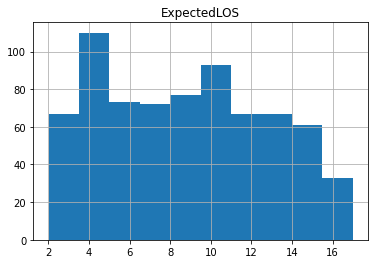

In [11]:
#15. Plot a graph to show the distribution of expected length of stay

ReAdmissionRegistry_df= dict_df.get('ReAdmissionRegistry')
ReAdmissionRegistry_df.hist ('ExpectedLOS')
plt.show()

### 16. Create a heat map to show the correlation between the column values of Edvisits

<AxesSubplot:>

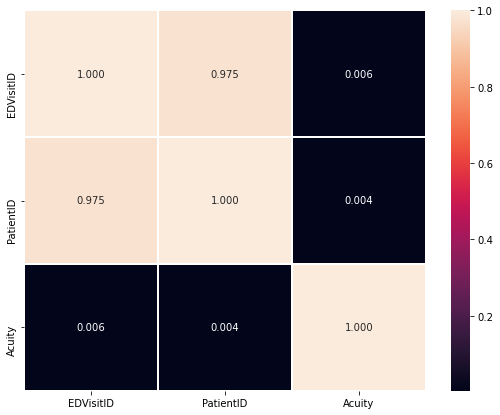

In [89]:
#16. Create a heat map to show the correlation between the column values of Edvisits

EDVisits_df= dict_df.get('EDVisits')

corr = EDVisits_df.corr()
f, ax = plt.subplots(figsize = (9,7))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)



### 12:Create a subplot with 2 rows & 2 columns with object oriented approach

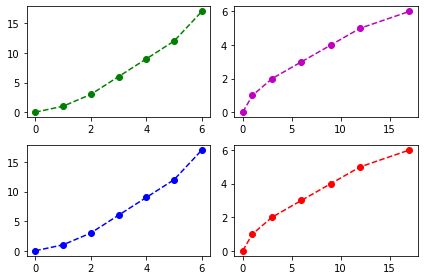

In [1]:
#12:Create a subplot with 2 rows & 2 columns with object oriented approach

# importing the matplotlib library
import matplotlib.pyplot as plt
  
# defining the values of X
x =[0, 1, 2, 3, 4, 5, 6]
  
# defining the value of Y
y =[0, 1, 3, 6, 9, 12, 17]
  
# creating the canvas with class 'fig'
# and it's object 'axes' with '1' row 
# and '2' columns
fig, axes = plt.subplots(2, 2)
  
# plotting graph for 1st element
axes[0, 0].plot(x, y, 'g--o')
  
# plotting graph for 2nd element
axes[0, 1].plot(y, x, 'm--o')
  
# plotting graph for 3rd element
axes[1, 0].plot(x, y, 'b--o')
  
# plotting graph for 4th element
axes[1, 1].plot(y, x, 'r--o')
  
# Gives a clean look to the graphs
fig.tight_layout()

### 51. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [20]:
#51. Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

EDVisits_df=dict_df.get('EDVisits')

Patients_details = np.where((EDVisits_df['ReasonForVisit'] == 'Migraine',EDVisits_df['ReasonForVisit'] == 'Pneumonia', EDVisits_df['Acuity']>=2))
Patients_details  

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### 52: Retrieve the row with minimum DBP using sorting technique

In [41]:
#52: Retrieve the row with minimum DBP using sorting technique

AmbulatoryVisits_df=dict_df.get('AmbulatoryVisits')
Min_DBP_df=AmbulatoryVisits_df.sort_values(by=['BloodPressureDiastolic'])
Min_DBP_df.head(1)


,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


### 54: Mortality O.E

In [41]:
#54: Mortality O.E

rawdf = pd.read_excel("HospitalDB-PythonHack.xlsx", sheet_name='ReAdmissionRegistry')
rawdf['ObservedMortality']= rawdf['DischargeDisposition'].apply(lambda x: 1 if x == 'Expired' else 0 )


In [61]:
rawdf
#print(rawdf.dtypes)

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,ObservedMortality,MortalityRatio
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,0,0.0
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,0,0.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,0,0.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,0,0.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN,0,0.0
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,0,0.0
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,0,0.0
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,0,0.0


In [65]:
mortality=rawdf['ExpectedMortality'].sum()
mortality


243.40526924839037

In [66]:
mortality1=rawdf['ObservedMortality'].sum()
mortality1

104

In [79]:
num =243.40526924839037
ob=rawdf ['ObservedMortality']
rawdf['MortalityRatio'] = [i/num for i in ob]


In [80]:
rawdf

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,ObservedMortality,MortalityRatio
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,0,0.0
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,0,0.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,0,0.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,0,0.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN,0,0.0
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,0,0.0
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,0,0.0
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,0,0.0


### 53: Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit

In [46]:
#53: Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit

EDVisits_df=dict_df.get('EDVisits')

Reason=input('Enter your reason for visit:').title()

print("Number of Patients admitted with this Reason:", +sum(EDVisits_df.ReasonForVisit==Reason))


Enter your reason for visit:fever
Number of Patients admitted with this Reason: 234


### 55: Create a bar chart on service & expected length of stay

<AxesSubplot:xlabel='Service', ylabel='ExpectedMortality'>

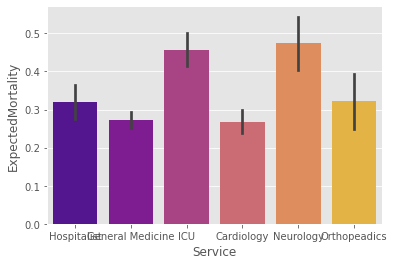

In [81]:
#55: Create a bar chart on service & expected length of stay
import seaborn as sns
REAdmissionRegistry_df=dict_df.get('REAdmissionRegistry')
sns.barplot(x ='Service', y ='ExpectedMortality', data = rawdf, palette ='plasma')


### 56. Count of cancelled status

In [98]:
#56. Count of cancelled status

AmbulatoryVisits_df=dict_df.get('AmbulatoryVisits')

AmbulatoryVisits_df['VisitStatus'].value_counts()['Canceled']


60

### 57. Find the age prone to get stroke

In [42]:
#57. Find the age prone to get stroke

#Combining two sheets

df_combine = ReAdmissionRegistry_df.merge(Patients_df, left_on='PatientID', right_on = "PatientID", how='left')
df_combine


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN,Konopelski,Group,1975-11-28 02:34:22.237,Female,White,English
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN,Chandal,Group,1985-04-19 17:45:10.810,Female,White,English
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN,Tiena,Mahomet,1960-07-23 09:04:25.637,Female,White,English
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN,Rogahn,Group,1960-03-14 20:14:13.941,Female,White,English


In [59]:
#Calculating Age:
import datetime
from datetime import datetime

df_combine['Date']= pd.to_datetime(df_combine.DateOfBirth)
df_combine['Date']
 
def from_dob_to_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_combine['Date'].apply(lambda x: from_dob_to_age(x))



0      62
1      36
2      46
3      60
4      53
       ..
715    46
716    37
717    61
718    62
719    41
Name: Date, Length: 720, dtype: int64

In [63]:
df_combine['Age']=df_combine['Date'].apply(lambda x: from_dob_to_age(x))
df_combine


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,...,EDVisitAfterDischargeFlag,FirstName,LastName,DateOfBirth,Gender,Race,Language,Date,result_Age,Age
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,...,NaN,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,1960-01-01 00:00:00.000,62,62
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,...,1.0,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,1985-11-15 02:08:42.090,36,36
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,...,1.0,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,1976-04-15 02:52:09.762,46,46
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,...,1.0,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,1962-05-01 19:12:58.950,60,60
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,...,NaN,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,1969-03-30 09:36:56.550,53,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,...,NaN,Konopelski,Group,1975-11-28 02:34:22.237,Female,White,English,1975-11-28 02:34:22.237,46,46
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,...,NaN,Chandal,Group,1985-04-19 17:45:10.810,Female,White,English,1985-04-19 17:45:10.810,37,37
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,...,NaN,Tiena,Mahomet,1960-07-23 09:04:25.637,Female,White,English,1960-07-23 09:04:25.637,61,61
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,...,NaN,Rogahn,Group,1960-03-14 20:14:13.941,Female,White,English,1960-03-14 20:14:13.941,62,62


In [70]:
#Display age prone to stroke

df_combine_copy=df_combine.copy()
df_combine_copy.loc[(df_combine_copy['PrimaryDiagnosis']=='Stroke')]

df_combine_copy.loc[df_combine_copy['PrimaryDiagnosis'] == 'Stroke', ['PrimaryDiagnosis','Age']]



,PrimaryDiagnosis,Age
8,Stroke,52
12,Stroke,51
18,Stroke,62
34,Stroke,35
40,Stroke,56
...,...,...
581,Stroke,38
582,Stroke,39
591,Stroke,46
622,Stroke,61


### 58. Display total count of patients service wise based on gender

In [9]:
#58. Display total count of patients service wise based on gender

ReAdmissionRegistry_df = dict_df.get('ReAdmissionRegistry')
Patients_df=dict_df.get('Patients')
c=ReAdmissionRegistry_df.groupby(['Service',Patients_df['Gender']])['PatientID'].count()
print(c)

Service           Gender
Cardiology        Female     48
                  Male       47
General Medicine  Female    121
                  Male      142
Hospitalist       Female     30
                  Male       71
ICU               Female     54
                  Male       97
Neurology         Female     34
                  Male       31
Orthopeadics      Female     20
                  Male       25
Name: PatientID, dtype: int64


### 59. Create a dataframe by splitting provider name to firstname and lastname with names for the columns

In [13]:
#59. Create a dataframe by splitting provider name to firstname and lastname with names for the columns

Providers_df= dict_df.get('Providers')

Providers_df_copy=Providers_df.copy()

Providers_df[['first_name','last_name']] = Providers_df['ProviderName'].str.split(expand=True)

Providers_df_copy.head()


,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff,first_name,last_name
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000,Sally,Sue
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695,Mike,Myers
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687,Jordan,Michael
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299,Ted,Texas
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838,Ala,Bama


### 60: Predict the output of the program..

In [16]:
#60: Predict the output of the program..

class Acc:
    def __init__(self, id):
        self.id = id
id = 555 

acc = Acc(111) 
print(acc.id)


111
